In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('bmh')
plt.rc('text', usetex=True)   #  Might require installing TeX fonts
plt.rc('axes', facecolor='w', labelcolor='b', edgecolor='k', labelsize=16)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

In [3]:
## Read coref_speed.csv
coref_speed_dets = pd.read_csv('coref_speed.csv')
coref_speed_dets = coref_speed_dets.drop(columns=['Unnamed: 0'])
met_speed_dets = pd.read_csv('met_speed.csv')
met_speed_dets = met_speed_dets.drop(columns=['Unnamed: 0'])
# met_speed_dets

[0.004911560761301106, 0.014088153839111278, 0.0008281866709390666, 0.0378309885660807]


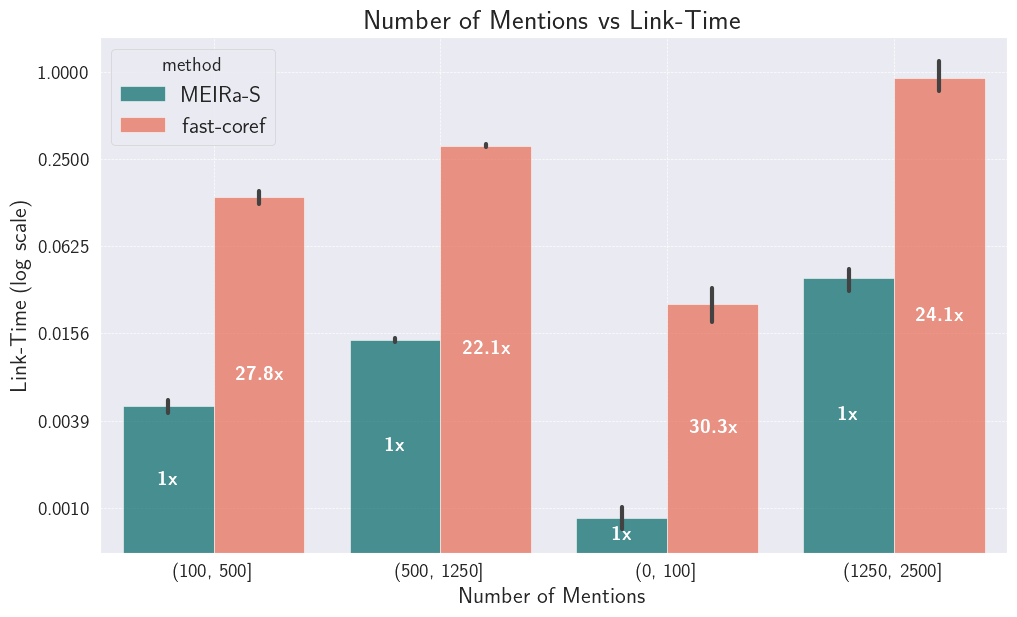

In [8]:
## Merge speed_dets_coref_df and speed_dets_met_df and create "method" column
coref_speed_dets['method'] = 'fast-coref'
met_speed_dets['method'] = 'MEIRa-S'
## Merge
speed_dets = pd.concat([coref_speed_dets,met_speed_dets])

plt.figure(figsize=(10, 6))

# Define the order of categories
hue_order = ['MEIRa-S', 'fast-coref']
# palette = [sns.palettes.color_palette()[1],sns.palettes.color_palette()[0]]
palette = ['teal', 'tomato']

# Beautify the plot
sns.set_style('darkgrid')

barplot = sns.barplot(data=speed_dets, x='num_mentions_bins', y='link_time', hue='method',hue_order=hue_order,palette=palette, alpha=0.75)

# Annotate the bars inside the bar
prev_bar_heights = None
for container_ind,container in enumerate(barplot.containers):
    if container_ind % 2 == 0:
        barplot.bar_label(container, labels=[f'\\textbf{{1x}}' for v in container], label_type='center', color='white')
        prev_bar_heights = [v.get_height() for v in container]
    else:
        print(prev_bar_heights)
        # barplot.bar_label(container, labels=[f'{v.get_height():.2f}x' for v in container], label_type='center', color='white', fontsize=10)
        barplot.bar_label(container, labels=[f'\\textbf{{{v.get_height()/prev_bar_heights[v_ind]:.1f}x}}' for v_ind,v in enumerate(container)], label_type='center', color='white')

# Add labels and title
plt.xlabel('Number of Mentions')
plt.ylabel('Link-Time (log scale)')
plt.title('Number of Mentions vs Link-Time')
# plt.legend(title='Datasets')


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Apply logarithmic scale to y-axis
plt.yscale('log',base=2)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.4f}'.format(x)))

# Show the plot
plt.tight_layout(pad=0.07)
plt.savefig("./speed_comp.jpg", format='jpg', dpi=300)
plt.show()